In [2]:
# !pip install agentpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.9/53.9 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.9/778.9 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 8.7 MB/s eta 0:00:00


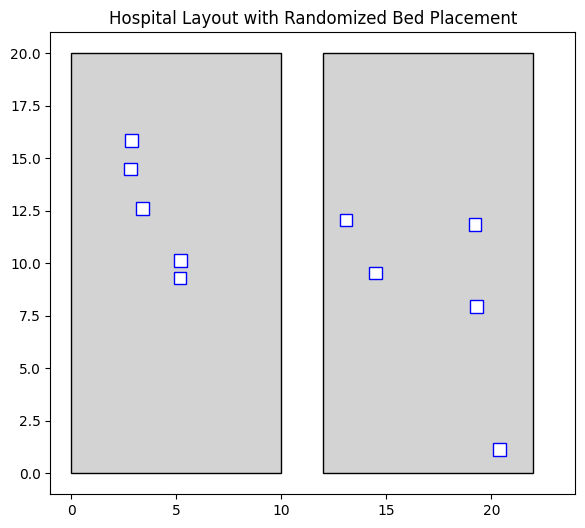

In [11]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random

class Hospital:
    def __init__(self, ward_count=1, ward_size=(10, 20)):
        """
        Initialize the hospital with adjustable number of wards and default size.

        Args:
            ward_count (int): Number of wards in the hospital.
            ward_size (tuple): (width, height) of each ward.
        """
        self.ward_count = ward_count
        self.ward_size = ward_size
        self.wards = []
        self._create_wards()

    def _create_wards(self):
        """Generate wards as rectangles with randomly spaced beds inside."""
        for i in range(self.ward_count):
            x_offset = i * (self.ward_size[0] + 2)  # Adjust spacing between wards
            ward = {
                "x": x_offset,
                "y": 0,
                "width": self.ward_size[0],
                "height": self.ward_size[1],
                "beds": []
            }
            # Add a limited number of randomly placed beds
            num_beds = random.randint(5, 10)  # Random number of beds per ward
            for _ in range(num_beds):
                bed_x = random.uniform(x_offset + 1, x_offset + self.ward_size[0] - 1)
                bed_y = random.uniform(1, self.ward_size[1] - 1)
                ward["beds"].append((bed_x, bed_y))
            self.wards.append(ward)

    def display(self):
        """Visualize the hospital wards and their beds."""
        fig, ax = plt.subplots(figsize=(12, 6))
        for ward in self.wards:
            # Draw the ward as a rectangle
            ward_rect = patches.Rectangle(
                (ward["x"], ward["y"]),
                ward["width"],
                ward["height"],
                edgecolor='black',
                facecolor='lightgrey'
            )
            ax.add_patch(ward_rect)
            # Draw the beds as smaller squares randomly spread inside the ward
            for bed in ward["beds"]:
                bed_rect = patches.Rectangle(
                    (bed[0] - 0.3, bed[1] - 0.3),  # Slightly smaller and spread out
                    0.6,
                    0.6,
                    edgecolor='blue',
                    facecolor='white'
                )
                ax.add_patch(bed_rect)
        # Set the plot limits and aspect
        ax.set_xlim(-1, self.ward_count * (self.ward_size[0] + 2))
        ax.set_ylim(-1, self.ward_size[1] + 1)
        ax.set_aspect('equal')
        plt.title("Hospital Layout with Randomized Bed Placement")
        plt.show()

# Example usage
hospital = Hospital(ward_count=2, ward_size=(10, 20))
hospital.display()
